<a href="https://colab.research.google.com/github/Wangadeveloper/Failure-Classifier-to-Maintenance/blob/main/prediction_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head(1)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [6]:
train_stats=train.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
id,54273.0,27136.000000,15667.409917,0.0,13568.0,27136.0,40704.0,54272.0
model_year,54273.0,2015.091979,5.588909,1974.0,2012.0,2016.0,2019.0,2024.0
milage,54273.0,72746.175667,50469.490448,100.0,32268.0,66107.0,102000.0,405000.0
price,54273.0,39218.443333,72826.335535,2000.0,15500.0,28000.0,45000.0,2954083.0


In [7]:
train_cols=train.columns
train_cols

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [8]:
# Import the regular expressions module
import re

# Define the regular expression pattern
pattern = r'[^\w\s]'

# Use regular expressions to remove special characters from the 'text' column
train[train_cols] = train[train_cols].replace(pattern, '', regex=True)

# Print the updated DataFrame
train.head(1)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F150 Lariat,2018,74349,Gasoline,3750HP 35L V6 Cylinder Engine Gasoline Fuel,10Speed AT,Blue,Gray,None reported,Yes,11000


In [9]:
X=train.drop(['price'],axis=1)
y=train['price']

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.20)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
mean=train_stats.loc['milage','mean']
std=train_stats.loc['milage','std']
xtrain.loc[:, 'milage'] = (xtrain.loc[:, 'milage'] - mean)/std
xtest.loc[:, 'milage'] = (xtest.loc[:, 'milage'] - mean)/std
xtrain.head(1)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
22883,22883,BMW,540 i xDrive,2015,0.292332,Gasoline,3350HP 30L Straight 6 Cylinder Engine Gasoline...,8Speed AT,Silver,Black,None reported,Yes


In [13]:
numeric_feature=[]
numeric_feature.append(tf.feature_column.numeric_column(key='milage'))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [14]:
#creating the bucket feature column due on the year colunm
train['model_year'].unique()

array([2018, 2007, 2009, 2022, 2001, 2003, 2014, 2019, 2016, 2017, 2013,
       2021, 2015, 2020, 2012, 2006, 2023, 2011, 2010, 1999, 2004, 1993,
       2002, 2005, 2008, 1995, 1998, 2000, 1997, 1994, 1996, 2024, 1992,
       1974])

In [15]:
feature_year=tf.feature_column.numeric_column(key='model_year')
feature_bucket=[]
feature_bucket.append(tf.feature_column.bucketized_column(source_column=feature_year,
                                                          boundaries=[1970,2000,2010,2020]))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [16]:
categorical_features=[]

In [17]:
categorical_indicated_features=[]
categorical_indicated_features.append(['brand', 'model', 'model_year', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'])

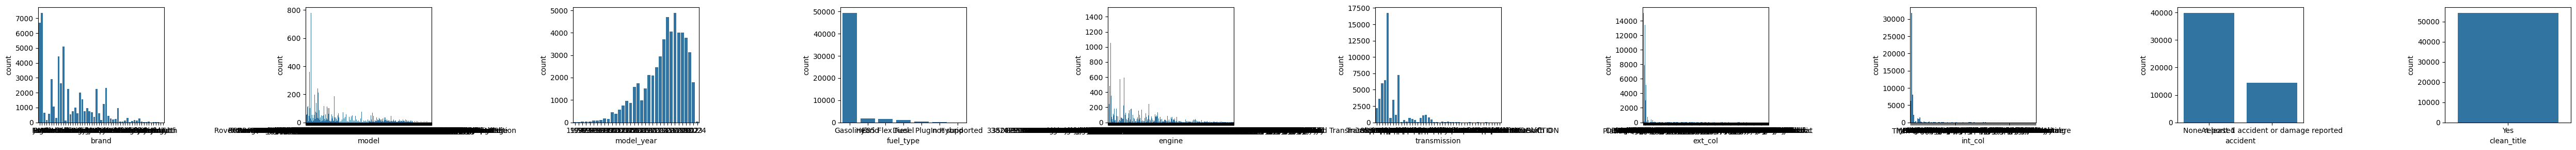

In [18]:
import seaborn as sns
cols=['brand', 'model','model_year','fuel_type','engine',
      'transmission','ext_col','int_col', 'accident', 'clean_title']
fig, axs= plt.subplots(1,len(cols),figsize=(len(cols)*5,3))
column_list=[]
for i,column in enumerate(cols):
    column_list.append(cols[i])
    _=sns.countplot(train,x=column,ax=axs[i])

_=fig.tight_layout()

In [19]:
list=[]
for columns in cols:
    list.append(train[columns].unique())
list

[array(['Ford', 'BMW', 'Jaguar', 'Pontiac', 'Acura', 'Audi', 'GMC',
        'Maserati', 'Chevrolet', 'Porsche', 'MercedesBenz', 'Tesla',
        'Lexus', 'Kia', 'Lincoln', 'Dodge', 'Volkswagen', 'Land',
        'Cadillac', 'Mazda', 'RAM', 'Subaru', 'Hyundai', 'MINI', 'Jeep',
        'Honda', 'Hummer', 'Nissan', 'Toyota', 'Volvo', 'Genesis',
        'Mitsubishi', 'Buick', 'INFINITI', 'McLaren', 'Scion',
        'Lamborghini', 'Bentley', 'Suzuki', 'Ferrari', 'Alfa',
        'RollsRoyce', 'Chrysler', 'Aston', 'Rivian', 'Lotus', 'Saturn',
        'Lucid', 'Mercury', 'Maybach', 'FIAT', 'Plymouth', 'Bugatti'],
       dtype=object),
 array(['F150 Lariat', '335 i', 'XF Luxury', ...,
        'Q4 etron Sportback Premium', 'Countryman Cooper', 'S10 LS'],
       dtype=object),
 array([2018, 2007, 2009, 2022, 2001, 2003, 2014, 2019, 2016, 2017, 2013,
        2021, 2015, 2020, 2012, 2006, 2023, 2011, 2010, 1999, 2004, 1993,
        2002, 2005, 2008, 1995, 1998, 2000, 1997, 1994, 1996, 2024, 1992,
  

In [20]:
cat_features=[]
for i in range(len(list)):
    cat_features.append(tf.feature_column.categorical_column_with_vocabulary_list(
        key=column_list[i],vocabulary_list=[i for i in range(len(list[i]))]))

cat_features

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='brand', vocabulary_list=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='model', vocabulary_list=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 14

In [21]:
categorical_indicator_features = []
for i ,val in enumerate(cat_features):
    categorical_indicator_features.append(tf.feature_column.indicator_column(
        cat_features[i]))

categorical_indicator_features

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='brand', vocabulary_list=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52), dtype=tf.int64, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='model', vocabulary_list=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 1

In [22]:
def train_input_fn(xtrain,ytrain, batch_size=8):
    dataset = tf.data.Dataset.from_tensor_slices((dict(xtrain), ytrain))
     # shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

In [23]:
ds = train_input_fn(xtrain,ytrain)
batch = next(iter(ds))
print('Keys:', batch[0].keys())
print('Batch Model Years:', batch[0]['model_year'])

Keys: dict_keys(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'])
Batch Model Years: tf.Tensor([2004 2012 2007 2022 2016 2015 2010 2020], shape=(8,), dtype=int64)


In [28]:
def eval_input_fn(xtest,ytest, batch_size=8):
    dataset = tf.data.Dataset.from_tensor_slices((dict(xtest), ytest))
    return dataset.batch(batch_size)

In [29]:
all_feature_columns = (
    numeric_feature +
    feature_bucket +
    categorical_indicated_features)

In [30]:
print(all_feature_columns)

[NumericColumn(key='milage', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), BucketizedColumn(source_column=NumericColumn(key='model_year', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(1970, 2000, 2010, 2020)), ['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']]


In [31]:
regressor = tf.estimator.DNNRegressor(feature_columns=all_feature_columns,
                                      hidden_units=[32, 10],
                                      model_dir='models/autompg-dnnregressor/')

In [36]:
reloaded_regressor = tf.compat.v1.estimator.DNNRegressor(feature_columns=all_feature_columns,hidden_units=[32, 10],
                                               warm_start_from='models/autompg-dnnregressor/',
                                               model_dir='models/autompg-dnnregressor/')

Instructions for updating:
Use tf.keras instead.


In [37]:
eval_results = reloaded_regressor.evaluate(input_fn=lambda:eval_input_fn(xtest,ytest, batch_size=8))
print('Average-Loss {:.4f}'.format(eval_results['average_loss']))

Instructions for updating:
Use tf.keras instead.


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/tensorflow_estimator/python/estimator/canned/dnn.py", line 240, in call  *
        net = self._input_layer(features)

    ValueError: Items of feature_columns must be a _FeatureColumn. Given (type <class 'list'>): ['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'].
    
    originally defined at:
      File "/usr/local/lib/python3.10/dist-packages/tensorflow_estimator/python/estimator/canned/dnn.py", line 85, in dnn_logit_fn
        dnn_model = _DNNModel(
      File "/usr/local/lib/python3.10/dist-packages/tensorflow_estimator/python/estimator/canned/dnn.py", line 173, in __init__
        self._input_layer = feature_column.InputLayer(
      File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/feature_column/feature_column.py", line 340, in __init__
        self._input_layer_template = template.make_template(
      File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/template.py", line 167, in make_template
        return make_template_internal(
    
